In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error 

In [3]:
df = pd.read_csv('allsegments.csv')
df.head(10)

,segment,x1,x2,duration,distance,weather,peak
0,1,LRT TMN BAHAGIA,RUMAH NO. 57 JLN SS4A/1,198,165,1,0
1,1,LRT TMN BAHAGIA,RUMAH NO. 57 JLN SS4A/1,188,178,1,0
2,1,LRT TMN BAHAGIA,RUMAH NO. 57 JLN SS4A/1,45,148,1,0
3,1,LRT TMN BAHAGIA,RUMAH NO. 57 JLN SS4A/1,45,162,1,0
4,1,LRT TMN BAHAGIA,RUMAH NO. 57 JLN SS4A/1,159,176,1,0
5,1,LRT TMN BAHAGIA,RUMAH NO. 57 JLN SS4A/1,159,189,1,0
6,1,LRT TMN BAHAGIA,RUMAH NO. 57 JLN SS4A/1,78,186,1,0
7,1,LRT TMN BAHAGIA,RUMAH NO. 57 JLN SS4A/1,78,197,1,0
8,1,LRT TMN BAHAGIA,RUMAH NO. 57 JLN SS4A/1,130,67,1,0
9,1,LRT TMN BAHAGIA,RUMAH NO. 57 JLN SS4A/1,130,81,1,0


In [26]:
# Extract the training and test data
data = df.values
X = data[:,[0,4,5,6]]
y = data[:,3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train[:10]

array([[11, 33, 1, 0],
       [4, 104, 1, 0],
       [1, 134, 1, 0],
       [17, 62, 1, 0],
       [13, 178, 1, 0],
       [11, 8, 1, 1],
       [9, 45, 1, 0],
       [18, 96, 1, 0],
       [20, 186, 1, 1],
       [9, 48, 1, 0]], dtype=object)

In [27]:
# Scale the data to be between -1 and 1
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train[:10]

C:\Users\seong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\seong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\seong\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.05870636, -1.25653271, -0.40180723, -0.49824129],
       [-0.98034614, -0.05960795, -0.40180723, -0.49824129],
       [-1.42565435,  0.44613491, -0.40180723, -0.49824129],
       [ 0.94932279, -0.76764795, -0.40180723, -0.49824129],
       [ 0.35557851,  1.1878911 , -0.40180723, -0.49824129],
       [ 0.05870636, -1.67798509, -0.40180723,  2.00705968],
       [-0.23816578, -1.05423557, -0.40180723, -0.49824129],
       [ 1.09775886, -0.19447271, -0.40180723, -0.49824129],
       [ 1.39463101,  1.32275586, -0.40180723,  2.00705968],
       [-0.23816578, -1.00366128, -0.40180723, -0.49824129]])

In [56]:
# Establish a model
model = SVR(C=1000, cache_size=500, epsilon=27, kernel='rbf')

In [57]:
# Train the model - this will take a minute
model.fit(X_train, y_train)

SVR(C=1000, cache_size=500, coef0=0.0, degree=3, epsilon=27,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [58]:
# Score the model
model.score(X_test, y_test)

0.1869826208358998

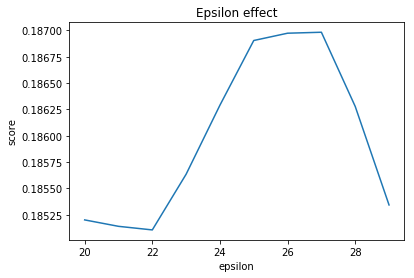

In [55]:
# Not a great score. Try other epsilons - this will take about 5 minutes.
epsilons = np.arange(20,30)
scores = []
for e in epsilons:
    model.set_params(epsilon=e)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.plot(epsilons, scores)
plt.title("Epsilon effect")
plt.xlabel("epsilon")
plt.ylabel("score")
plt.show()

In [ ]:
model.set_params(epsilon=5)
Cs = [1e0, 1e1, 1e2, 1e3,1e4,1e5]
scores = []
for c in Cs:
    model.set_params(C=c)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.plot(Cs, scores)
plt.title("C effect")
plt.xlabel("C")
plt.ylabel("score")
plt.show()

In [ ]:
mse =mean_squared_error(y, pred_y)
print("Mean Squared Error:",mse)
 
rmse = math.sqrt(mse)
print("Root Mean Squared Error:", rmse)